#### machine learning preliminary experiment

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
shuffled = pd.read_pickle('../dataset/merged_data_shuffled_3class.pkl')
shuffled = shuffled[['AC026691.1','IRX3','end']]

train = shuffled[0:int(0.9*shuffled.shape[0])]
test = shuffled[int(0.9*shuffled.shape[0]):]

labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end']))
print(labels.shape)
print(features.shape)

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end']))

X = features
Y = labels
print(Y)

(110,)
(110, 2)
[1 1 1 0 2 1 2 0 1 1 0 1 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 1 0 0 0 1 0 0 2 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 2 1 0 1 2 0 1
 1 0 1 2 1 1 1 0 0 1 2 1 1 2 1 0 1 0 2 1 2 0 0 0 0 2 0 0 0 0 0 1 0 1 2 0]


              precision    recall  f1-score   support

          re       0.88      1.00      0.93         7
         sym       0.67      1.00      0.80         2
         con       0.00      0.00      0.00         2

    accuracy                           0.82        11
   macro avg       0.51      0.67      0.58        11
weighted avg       0.68      0.82      0.74        11



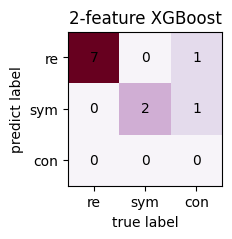

In [3]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import class_weight
# , sample_weight=compute_sample_weight("balanced", y)
model_name = 'XGBoost'

clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.75      0.86      0.80         7
         sym       0.50      0.50      0.50         2
         con       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.75      0.62      0.66        11
weighted avg       0.75      0.73      0.72        11



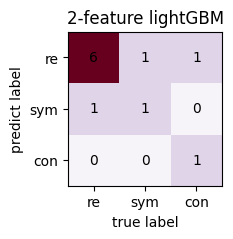

In [4]:
import lightgbm as lgb

model_name = 'lightGBM'

clf = lgb.LGBMClassifier(n_jobs=-1)
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.75      0.86      0.80         7
         sym       0.50      0.50      0.50         2
         con       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.75      0.62      0.66        11
weighted avg       0.75      0.73      0.72        11



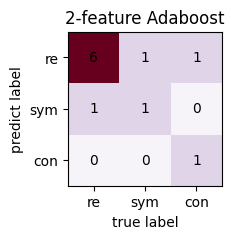

In [5]:
from sklearn.ensemble import AdaBoostClassifier

model_name = 'Adaboost'

clf = AdaBoostClassifier()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.78      1.00      0.88         7
         sym       0.50      0.50      0.50         2
         con       0.00      0.00      0.00         2

    accuracy                           0.73        11
   macro avg       0.43      0.50      0.46        11
weighted avg       0.59      0.73      0.65        11



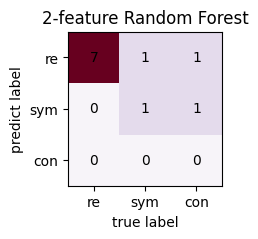

In [6]:
from sklearn.ensemble import RandomForestClassifier

model_name = 'Random Forest'

clf = RandomForestClassifier()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)

#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.71      0.71      0.71         7
         sym       0.25      0.50      0.33         2
         con       0.00      0.00      0.00         2

    accuracy                           0.55        11
   macro avg       0.32      0.40      0.35        11
weighted avg       0.50      0.55      0.52        11



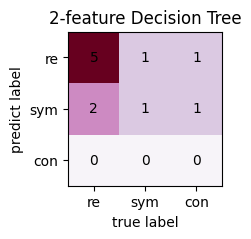

In [7]:
from sklearn.tree import DecisionTreeClassifier

model_name = 'Decision Tree'

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.80      0.57      0.67         7
         sym       0.50      0.50      0.50         2
         con       0.50      1.00      0.67         2

    accuracy                           0.64        11
   macro avg       0.60      0.69      0.61        11
weighted avg       0.69      0.64      0.64        11



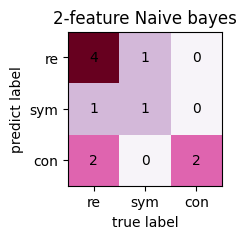

In [8]:
from sklearn.naive_bayes import GaussianNB

model_name = 'Naive bayes'

clf = GaussianNB()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.75      0.86      0.80         7
         sym       0.50      0.50      0.50         2
         con       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.75      0.62      0.66        11
weighted avg       0.75      0.73      0.72        11



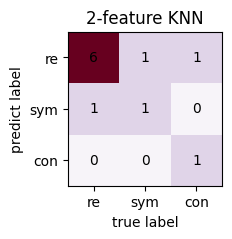

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'

clf = KNeighborsClassifier()
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.83      0.71      0.77         7
         sym       0.00      0.00      0.00         2
         con       0.50      1.00      0.67         2

    accuracy                           0.64        11
   macro avg       0.44      0.57      0.48        11
weighted avg       0.62      0.64      0.61        11



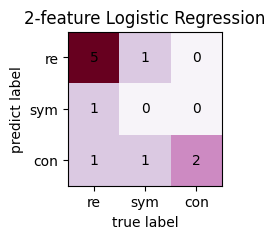

In [10]:
from sklearn.linear_model import LogisticRegression

model_name = 'Logistic Regression'

clf = LogisticRegression()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('2-feature '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()